In [6]:
import pandas as pd

# Load the data from the provided Excel file
file_path = '/Users/bbeardsley/Desktop/Senior_Risk_Leader_Case_Data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure and contents
data.head()

,BRAND_TOKEN,BRAND_NAME,CREATED_AT,BRAND_FIRST_FIRST_ACTIVE_AT,PRIMARY_CATEGORY_1,BASED_IN,SHIPPED_FROM_COUNTRY,EU_OR_UK,GMV_L6M,TOTAL_SHIPPING_COST_L6M,NET_FAIRE_SHIPPING_COST_L6M,POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M
0,b_zzgyhi05sd,The Bitter Housewife,2019-02-15 00:49:07,2019-03-05 16:27:10.158,Food & Drink,USA,USA,0,63202.66,6360.37,3941.28,3027.70
1,b_zz3uf54cby,Wristy Buddy,2021-11-12 05:42:43,2021-11-12 10:53:21.128,Kids & Baby,USA,USA,0,135.00,0.00,0.00,29.03
2,b_zydbmg30f7,Guttersnipe Press Letterpress Greetings,2019-02-07 22:05:08,2020-02-15 14:59:21.947,Paper & Novelty,USA,USA,0,13948.90,646.74,364.54,1767.51
3,b_zxmmrgud7s,Wandering Sol Pty Ltd,2021-10-07 01:23:24,2021-11-01 10:14:28.071,Accessories,AUS,AUS,0,243.00,177.46,116.71,-62.61
4,b_zxhjhm9zr2,qontur,2021-06-17 22:25:10,2021-08-16 15:00:12.323,Home Decor,DEU,DEU,1,604.81,50.16,50.16,-25.91


In [9]:
# Loading data from the first sheet "Ship on Your Own Raw Data"
ship_own_data = data_sheets["Ship on Your Own Raw Data"]

# Getting the shape of the data
data_shape = ship_own_data.shape

# Overview of the data
data_overview = ship_own_data.describe()

data_shape, data_overview

((15986, 12),
            EU_OR_UK       GMV_L6M  TOTAL_SHIPPING_COST_L6M  \
 count  15986.000000  1.598600e+04             15982.000000   
 mean       0.214625  1.175051e+04              1417.073876   
 std        0.410575  5.201176e+04              9569.601442   
 min        0.000000  0.000000e+00                 0.000000   
 25%        0.000000  3.210000e+02                18.060000   
 50%        0.000000  1.102015e+03                90.000000   
 75%        0.000000  4.867525e+03               504.940000   
 max        1.000000  1.838239e+06            726743.910000   
 
        NET_FAIRE_SHIPPING_COST_L6M  \
 count                 15982.000000   
 mean                    638.513376   
 std                    6156.844238   
 min                       0.000000   
 25%                       0.000000   
 50%                      31.125000   
 75%                     213.090000   
 max                  491705.730000   
 
        POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M  
 cou

Shape: The dataset consists of 15,986 rows and 12 columns.

Overview:

EU_OR_UK: About 21.46% of the brands are based in the EU or UK, with the rest located elsewhere.

GMV_L6M (Gross Merchandise Value Last 6 Months): The average GMV over the last six months is approximately USD11,750, with a wide range from USD0 to over USD1.83 million, indicating a significant variance in the sales volume among different brands.

TOTAL_SHIPPING_COST_L6M: The average total shipping cost in the last six months is about USD1,417, but this also varies greatly among brands, going as high as about USD 726,744.

NET_FAIRE_SHIPPING_COST_L6M: The average net Faire shipping cost in the last six months is around USD639, with a maximum of around USD491,706.

POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M: The average post-freight contribution after netting Faire discounts in the last six months is approximately USD488. This value also shows a large variance, ranging from a negative value (indicating a loss) to a high positive value.

##### High Shipping Cost Ratio: Brands with a high ratio of Faire-funded shipping costs to Gross Merchandise Value (GMV). This ratio indicates the extent to which Faire is bearing the shipping costs relative to the sales generated by the brand.

##### Negative Contribution Margin: Brands with a negative post-freight contribution margin net of Faire-funded discounts. This indicates that the cost (including shipping) exceeds the revenue generated, leading to a loss.

In [10]:
# Calculating additional metrics for analysis
data['Shipping_Cost_Ratio'] = data['NET_FAIRE_SHIPPING_COST_L6M'] / data['GMV_L6M']
data['Is_Negative_Contribution'] = data['POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M'] < 0

# Sorting data based on the shipping cost ratio and negative contribution margin
worst_offenders = data.sort_values(by=['Shipping_Cost_Ratio', 'Is_Negative_Contribution'], ascending=[False, False])

# Displaying the top brands that are worst offenders
worst_offenders.head()

,BRAND_TOKEN,BRAND_NAME,CREATED_AT,BRAND_FIRST_FIRST_ACTIVE_AT,PRIMARY_CATEGORY_1,BASED_IN,SHIPPED_FROM_COUNTRY,EU_OR_UK,GMV_L6M,TOTAL_SHIPPING_COST_L6M,NET_FAIRE_SHIPPING_COST_L6M,POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M,Shipping_Cost_Ratio,Is_Negative_Contribution
13326,b_3zzx25qicg,nalho,2019-07-22 16:36:20,2019-09-06 14:32:28.725,Footwear,USA,USA,0,0.00,12.65,2.15,-2.53,inf,True
488,b_wnzuugabfd,OXYGEN WATER,2021-10-19 12:36:18,2021-11-01 15:00:14.735,Beauty & Wellness,FRA,FRA,1,1811.58,4400.00,4400.00,-4380.62,2.428819,True
10692,b_6qspxcf9jt,Maison Bruyere,2021-09-13 11:34:17,2021-10-23 15:00:03.039,Food & Drink,FRA,FRA,1,819.48,1638.68,1638.68,-1380.80,1.999658,True
5802,b_bvezjhuhmg,Bee Zen,2021-07-28 19:25:13,2021-09-21 05:40:07.034,Food & Drink,FRA,FRA,1,1449.03,2891.69,2891.69,-2632.29,1.995604,True
5695,b_bzqtfmhk6n,CIDER MAURET,2021-06-08 18:25:14,2021-08-02 15:00:01.658,Food & Drink,FRA,USA,0,282.72,564.00,564.00,-476.32,1.994907,True


In [11]:
# Filtering out brands with zero GMV
non_zero_gmv = worst_offenders[worst_offenders['GMV_L6M'] > 0]

# Displaying the top brands with non-zero GMV that are worst offenders
non_zero_gmv.head()

,BRAND_TOKEN,BRAND_NAME,CREATED_AT,BRAND_FIRST_FIRST_ACTIVE_AT,PRIMARY_CATEGORY_1,BASED_IN,SHIPPED_FROM_COUNTRY,EU_OR_UK,GMV_L6M,TOTAL_SHIPPING_COST_L6M,NET_FAIRE_SHIPPING_COST_L6M,POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M,Shipping_Cost_Ratio,Is_Negative_Contribution
488,b_wnzuugabfd,OXYGEN WATER,2021-10-19 12:36:18,2021-11-01 15:00:14.735,Beauty & Wellness,FRA,FRA,1,1811.58,4400.00,4400.00,-4380.62,2.428819,True
10692,b_6qspxcf9jt,Maison Bruyere,2021-09-13 11:34:17,2021-10-23 15:00:03.039,Food & Drink,FRA,FRA,1,819.48,1638.68,1638.68,-1380.80,1.999658,True
5802,b_bvezjhuhmg,Bee Zen,2021-07-28 19:25:13,2021-09-21 05:40:07.034,Food & Drink,FRA,FRA,1,1449.03,2891.69,2891.69,-2632.29,1.995604,True
5695,b_bzqtfmhk6n,CIDER MAURET,2021-06-08 18:25:14,2021-08-02 15:00:01.658,Food & Drink,FRA,USA,0,282.72,564.00,564.00,-476.32,1.994907,True
14755,b_2f92789je7,Bacanha,2021-07-28 19:25:13,2021-09-24 15:00:00.757,Food & Drink,FRA,FRA,1,7713.08,15500.00,15382.20,-14089.50,1.994301,True


In [12]:
# Sorting the data based on the most negative post-freight contribution margin
most_negative_contribution = data.sort_values(by='POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M')

# Displaying the top brands with the most negative post-freight contribution margin
most_negative_contribution.head()

,BRAND_TOKEN,BRAND_NAME,CREATED_AT,BRAND_FIRST_FIRST_ACTIVE_AT,PRIMARY_CATEGORY_1,BASED_IN,SHIPPED_FROM_COUNTRY,EU_OR_UK,GMV_L6M,TOTAL_SHIPPING_COST_L6M,NET_FAIRE_SHIPPING_COST_L6M,POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M,Shipping_Cost_Ratio,Is_Negative_Contribution
7831,b_9qqlp5kqt7,UNISHE,2021-03-19 02:25:04,2021-09-09 07:20:44.335,Apparel,USA,CHN,0,934078.72,726743.91,490410.87,-366688.40,0.525021,True
14155,b_34ezyjafx6,beTWENTY,2020-08-11 04:25:01,2021-05-10 15:00:01.993,Home Decor,GBR,GBR,1,605236.86,501665.57,491705.73,-358146.06,0.812419,True
4024,b_dr4nb9txik,RomeoxJuliet.com,2021-05-13 22:25:04,2021-05-14 22:07:49.144,Accessories,DNK,CHN,0,130416.40,90933.60,90785.86,-138937.41,0.696123,True
10073,b_7d47c4y2y9,Osmond & Co.,2019-06-17 14:51:20,2019-09-27 22:17:04.999,Apparel,USA,USA,0,98221.80,0.00,0.00,-92731.29,0.000000,True
12285,b_525aohthoa,Bati,2019-08-29 21:28:06,2020-01-06 18:48:36.989,Home Decor,USA,USA,0,97877.60,0.00,0.00,-83872.65,0.000000,True


The top five brands exceeding their respective shipping cost thresholds, based on the rules set by Faire, are:

In [13]:
# Filtering brands based on the shipping cost thresholds
# European brands: Shipping costs above 2.00x GMV
# Other countries: Shipping costs above 1.00x GMV

# Identifying European countries (including UK) for the analysis
european_countries = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']

# Adding a column to identify European brands
data['Is_European'] = data['BASED_IN'].isin(european_countries)

# Calculating the threshold for each brand
data['Shipping_Cost_Threshold'] = data['GMV_L6M'] * data['Is_European'].map({True: 2.00, False: 1.00})

# Identifying brands exceeding their respective thresholds
brands_exceeding_threshold = data[data['NET_FAIRE_SHIPPING_COST_L6M'] > data['Shipping_Cost_Threshold']]

# Displaying the brands exceeding their thresholds
brands_exceeding_threshold[['BRAND_NAME', 'BASED_IN', 'GMV_L6M', 'NET_FAIRE_SHIPPING_COST_L6M', 'Shipping_Cost_Threshold']].head()

,BRAND_NAME,BASED_IN,GMV_L6M,NET_FAIRE_SHIPPING_COST_L6M,Shipping_Cost_Threshold
488,OXYGEN WATER,FRA,1811.58,4400.00,3623.16
621,Home Decor Lab,USA,745.99,746.00,745.99
927,REMOVED BRAND,NaN,234.98,370.00,234.98
1433,Paperclip & Co,CAN,49.24,49.25,49.24
3106,OSM,USA,361.00,397.50,361.00


In [15]:
# Identifying brands with negative POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M
brands_with_negative_contribution = data[data['POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M'] < 0]

# Combining the two sets of brands: those exceeding thresholds and those with negative contribution
combined_brands = pd.concat([brands_exceeding_threshold, brands_with_negative_contribution]).drop_duplicates()

# Calculating the total financial impact to Faire
total_financial_impact = combined_brands['NET_FAIRE_SHIPPING_COST_L6M'].sum()

total_financial_impact

5170107.540682044

The total financial impact to Faire from companies that either exceed the reimbursement threshold or have negative post-freight contribution margins net of Faire-funded discounts in the last six months is approximately $5,170,107.54. This figure represents a significant cost burden and highlights the need for policy review or operational adjustments to manage these expenses. ​​








In [16]:
# Extracting the list of companies that either exceed the reimbursement threshold or have negative contribution
list_of_companies = combined_brands[['BRAND_NAME', 'BASED_IN', 'GMV_L6M', 'NET_FAIRE_SHIPPING_COST_L6M', 'POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M']]

# Displaying the list
list_of_companies.reset_index(drop=True)

,BRAND_NAME,BASED_IN,GMV_L6M,NET_FAIRE_SHIPPING_COST_L6M,POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M
0,OXYGEN WATER,FRA,1811.58,4400.00,-4380.62
1,Home Decor Lab,USA,745.99,746.00,-357.42
2,REMOVED BRAND,NaN,234.98,370.00,-314.91
3,Paperclip & Co,CAN,49.24,49.25,-71.96
4,OSM,USA,361.00,397.50,185.97
...,...,...,...,...,...
4779,Vera Mona,USA,84.00,21.08,-20.30
4780,Chocolita,USA,395.78,0.00,-2.96
4781,Rebecca Green Design,USA,108.00,0.00,-2.44
4782,Bacon Basketware,CAN,32670.75,458.75,-1325.17


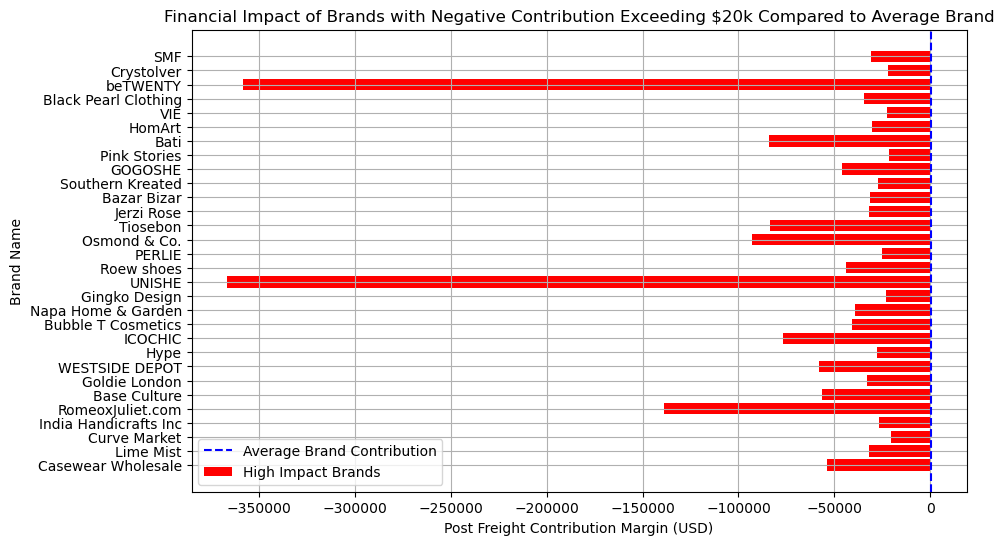

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Filtering brands with negative contribution exceeding $20,000
high_impact_brands = data[data['POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M'] < -20000]

# Calculating average contribution margin for all brands
average_contribution = data['POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M'].mean()

# Preparing data for the plot
high_impact_values = high_impact_brands['POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M']
brand_names = high_impact_brands['BRAND_NAME']
average_values = [average_contribution] * len(high_impact_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(brand_names, high_impact_values, color='red', label='High Impact Brands')
plt.axvline(x=average_contribution, color='blue', linestyle='--', label='Average Brand Contribution')

plt.xlabel('Post Freight Contribution Margin (USD)')
plt.ylabel('Brand Name')
plt.title('Financial Impact of Brands with Negative Contribution Exceeding $20k Compared to Average Brand')
plt.legend()
plt.grid(True)

plt.show()

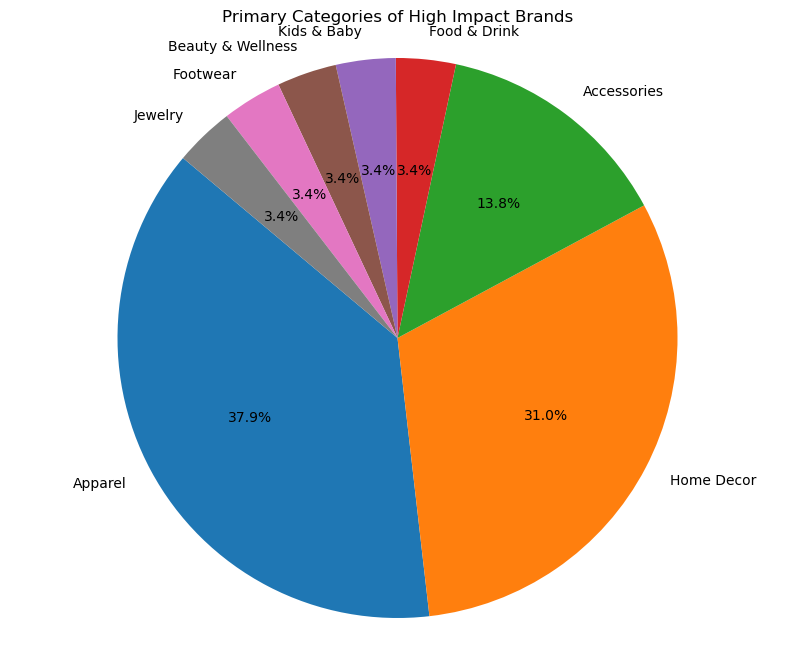

In [18]:
# Analyzing the primary categories of high-impact brands
category_counts = high_impact_brands['PRIMARY_CATEGORY_1'].value_counts()

# Plotting a pie chart for the categories
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Primary Categories of High Impact Brands')
plt.show()

In [20]:
# Analysis of the provided data from the 'Faire Direct Raw Data' sheet

# Import necessary libraries
import pandas as pd

# Load the data from the second sheet
file_path = '/Users/bbeardsley/Desktop/Senior_Risk_Leader_Case_Data.xlsx'
faire_direct_data = pd.read_excel(file_path, sheet_name='Faire Direct Raw Data')

# Displaying the basic statistics of the dataset
basic_stats = faire_direct_data.describe()

# Calculating the Marketplace Conversion Rate
# Marketplace Conversion Rate = (Number of Retailers with Marketplace Orders / Total Number of Retailers Ordering) * 100
faire_direct_data['Marketplace_Conversion_Rate'] = (
    faire_direct_data['RA_WITH_MARKETPLACE_ORDERS'] / faire_direct_data['N_FD_ORDERING_RETAILERS']
) * 100

# Calculating the Ratio of Referral Credits to Shipped GMV
faire_direct_data['Referral_Credits_to_GMV_Ratio'] = (
    faire_direct_data['REFERRAL_CREDITS'] / faire_direct_data['SHIPPED_GMV']
)

# Checking for any correlation between Referral Credits to GMV Ratio and Marketplace Conversion Rate
correlation_stats = faire_direct_data[['Referral_Credits_to_GMV_Ratio', 'Marketplace_Conversion_Rate']].corr()

# Displaying the results
basic_stats, correlation_stats

(       REFERRAL_CREDITS    SHIPPED_GMV  N_RETAILERS_SHARING_CARD  \
 count         97.000000      97.000000                 97.000000   
 mean      106522.576082   74393.367732                 22.061856   
 std       110284.700990   69823.052226                 81.109470   
 min        23244.180000   20169.330000                  0.000000   
 25%        48706.930000   31546.920000                  0.000000   
 50%        73714.030000   48369.000000                  3.000000   
 75%       122968.610000   83351.420000                  9.000000   
 max       871154.700000  352954.360000                629.000000   
 
        N_RETAILERS_SHARING_IP  N_FD_ORDERING_RETAILERS  \
 count               97.000000                97.000000   
 mean                79.659794               305.278351   
 std                138.688266               300.200445   
 min                  0.000000                67.000000   
 25%                 20.000000               133.000000   
 50%                 38

In [21]:
# Load the data from the first sheet ('Ship on Your Own Raw Data')
soyo_data = pd.read_excel(file_path, sheet_name='Ship on Your Own Raw Data')

# Displaying the basic statistics of the SOYO dataset
soyo_basic_stats = soyo_data.describe()

# Merging the Faire Direct data with SOYO data on BRAND_TOKEN to check for any correlations
merged_data = pd.merge(faire_direct_data, soyo_data, on='BRAND_TOKEN', how='inner')

# Calculating correlation between Faire Direct metrics and SOYO metrics
merged_correlation = merged_data.corr()

# Displaying the results
soyo_basic_stats, merged_correlation

/var/folders/hh/_79_23pd4k195159hkhl38980000gq/T/ipykernel_7039/2646277547.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_correlation = merged_data.corr()


(           EU_OR_UK       GMV_L6M  TOTAL_SHIPPING_COST_L6M  \
 count  15986.000000  1.598600e+04             15982.000000   
 mean       0.214625  1.175051e+04              1417.073876   
 std        0.410575  5.201176e+04              9569.601442   
 min        0.000000  0.000000e+00                 0.000000   
 25%        0.000000  3.210000e+02                18.060000   
 50%        0.000000  1.102015e+03                90.000000   
 75%        0.000000  4.867525e+03               504.940000   
 max        1.000000  1.838239e+06            726743.910000   
 
        NET_FAIRE_SHIPPING_COST_L6M  \
 count                 15982.000000   
 mean                    638.513376   
 std                    6156.844238   
 min                       0.000000   
 25%                       0.000000   
 50%                      31.125000   
 75%                     213.090000   
 max                  491705.730000   
 
        POST_FREIGHT_CONTRIBUTION_NET_FAIRE_DISCOUNTS_L6M  
 count            

In [22]:
# Re-loading the data from the provided Excel file to perform the analysis
file_path = '/Users/bbeardsley/Desktop/Senior_Risk_Leader_Case_Data.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)

# Extracting the relevant data from the 'Faire Direct Raw Data' sheet
faire_direct_data = excel_data['Faire Direct Raw Data']

# Calculating key metrics for analysis
# Marketplace Conversion Rate = (Number of Retailers with Marketplace Orders / Total Number of Retailers Ordering) * 100
faire_direct_data['Marketplace_Conversion_Rate'] = (
    faire_direct_data['RA_WITH_MARKETPLACE_ORDERS'] / faire_direct_data['N_FD_ORDERING_RETAILERS']
) * 100

# Also extracting data from the 'Ship on Your Own Raw Data' sheet for potential correlation analysis
soyo_data = excel_data['Ship on Your Own Raw Data']

# Merging the Faire Direct data with SOYO data on BRAND_TOKEN to check for any correlations
merged_data = pd.merge(faire_direct_data, soyo_data, on='BRAND_TOKEN', how='inner')

# Calculating correlation between Faire Direct metrics and SOYO metrics
merged_correlation = merged_data.corr()

# Analyzing the data with a focus on the Faire Direct metrics and potential correlations with SOYO metrics
analysis_results = {
    "Faire_Direct_Basic_Stats": faire_direct_data.describe(),
    "Marketplace_Conversion_Rate_Stats": faire_direct_data['Marketplace_Conversion_Rate'].describe(),
    "Merged_Correlation_Stats": merged_correlation[['Marketplace_Conversion_Rate']].dropna()
}

analysis_results

/var/folders/hh/_79_23pd4k195159hkhl38980000gq/T/ipykernel_7039/2684072285.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_correlation = merged_data.corr()


{'Faire_Direct_Basic_Stats':        REFERRAL_CREDITS    SHIPPED_GMV  N_RETAILERS_SHARING_CARD  \
 count         97.000000      97.000000                 97.000000   
 mean      106522.576082   74393.367732                 22.061856   
 std       110284.700990   69823.052226                 81.109470   
 min        23244.180000   20169.330000                  0.000000   
 25%        48706.930000   31546.920000                  0.000000   
 50%        73714.030000   48369.000000                  3.000000   
 75%       122968.610000   83351.420000                  9.000000   
 max       871154.700000  352954.360000                629.000000   
 
        N_RETAILERS_SHARING_IP  N_FD_ORDERING_RETAILERS  \
 count               97.000000                97.000000   
 mean                79.659794               305.278351   
 std                138.688266               300.200445   
 min                  0.000000                67.000000   
 25%                 20.000000               133.00000

In [25]:
# Identifying the worst offenders by brand based on low marketplace conversion rate
# We will consider brands with significantly low marketplace conversion rates as potential offenders

# Defining a threshold for low marketplace conversion rate
# For this analysis, we will consider brands with marketplace conversion rates below the 25th percentile as potential offenders
threshold = faire_direct_data['Marketplace_Conversion_Rate'].quantile(0.25)

# Filtering the brands that fall below this threshold
worst_offenders = faire_direct_data[faire_direct_data['Marketplace_Conversion_Rate'] <= threshold]

# Sorting the offenders by their marketplace conversion rate in ascending order
worst_offenders_sorted = worst_offenders.sort_values(by='Marketplace_Conversion_Rate', ascending=True)

# Selecting relevant columns for the final list: BRAND_TOKEN, NAME, Marketplace_Conversion_Rate
worst_offenders_list = worst_offenders_sorted[['BRAND_TOKEN', 'NAME', 'Marketplace_Conversion_Rate']]

worst_offenders_list.head()  # Displaying the top few rows of the worst offenders list

,BRAND_TOKEN,NAME,Marketplace_Conversion_Rate
78,b_wq64tr5u2c,Modesti,0.000000
56,b_aspbc472qv,Bibiland Apulia Flavour (Geniame SRLS),0.121359
0,b_uwcbw7cx4c,Club-Mate,0.229885
52,b_98rbqsp4zj,ROSEGOLD Paris,0.239188
36,b_sj27bmsq2x,Caffè Pompeii,0.593824


In [26]:
# Identifying brands with low marketplace conversion rates and high sharing activities
# High sharing activities can be indicated by a high number of retailers sharing cards or IPs

# Defining thresholds for high sharing activities
# For this analysis, we'll consider the upper quartiles (75th percentile) as the threshold for high sharing activities
card_sharing_threshold = faire_direct_data['N_RETAILERS_SHARING_CARD'].quantile(0.75)
ip_sharing_threshold = faire_direct_data['N_RETAILERS_SHARING_IP'].quantile(0.75)

# Filtering the brands that have low marketplace conversion rates and high sharing activities
brands_low_conversion_high_sharing = faire_direct_data[
    (faire_direct_data['Marketplace_Conversion_Rate'] <= threshold) &
    ((faire_direct_data['N_RETAILERS_SHARING_CARD'] >= card_sharing_threshold) |
     (faire_direct_data['N_RETAILERS_SHARING_IP'] >= ip_sharing_threshold))
]

# Sorting the results by marketplace conversion rate in ascending order
brands_low_conversion_high_sharing_sorted = brands_low_conversion_high_sharing.sort_values(
    by='Marketplace_Conversion_Rate', ascending=True
)

# Selecting relevant columns: BRAND_TOKEN, NAME, Marketplace_Conversion_Rate, N_RETAILERS_SHARING_CARD, N_RETAILERS_SHARING_IP
brands_low_conversion_high_sharing_list = brands_low_conversion_high_sharing_sorted[
    ['BRAND_TOKEN', 'NAME', 'Marketplace_Conversion_Rate', 'N_RETAILERS_SHARING_CARD', 'N_RETAILERS_SHARING_IP']
]

brands_low_conversion_high_sharing_list.head()  # Displaying the top few rows of the list

,BRAND_TOKEN,NAME,Marketplace_Conversion_Rate,N_RETAILERS_SHARING_CARD,N_RETAILERS_SHARING_IP
78,b_wq64tr5u2c,Modesti,0.000000,8,130
56,b_aspbc472qv,Bibiland Apulia Flavour (Geniame SRLS),0.121359,466,723
0,b_uwcbw7cx4c,Club-Mate,0.229885,47,129
52,b_98rbqsp4zj,ROSEGOLD Paris,0.239188,19,25
36,b_sj27bmsq2x,Caffè Pompeii,0.593824,102,722


In [27]:
# Identifying brands with the highest referral credits and analyzing their sharing activities and marketplace conversion rate

# Sorting the Faire Direct data by referral credits in descending order to find the brands with the highest referral credits
brands_sorted_by_referral_credits = faire_direct_data.sort_values(by='REFERRAL_CREDITS', ascending=False)

# Selecting the top brands based on referral credits
# We can choose a number, for example, the top 10 brands
top_brands_by_referral_credits = brands_sorted_by_referral_credits.head(10)

# Selecting relevant columns: BRAND_TOKEN, NAME, REFERRAL_CREDITS, Marketplace_Conversion_Rate, N_RETAILERS_SHARING_CARD, N_RETAILERS_SHARING_IP
top_brands_referral_credits_list = top_brands_by_referral_credits[
    ['BRAND_TOKEN', 'NAME', 'REFERRAL_CREDITS', 'Marketplace_Conversion_Rate', 'N_RETAILERS_SHARING_CARD', 'N_RETAILERS_SHARING_IP']
]

top_brands_referral_credits_list



,BRAND_TOKEN,NAME,REFERRAL_CREDITS,Marketplace_Conversion_Rate,N_RETAILERS_SHARING_CARD,N_RETAILERS_SHARING_IP
7,b_a78ftb8v4b,TPOB,871154.70,2.686859,165,476
71,b_g7qygg672v,pca blanks ltd,375719.97,17.105263,39,127
35,b_bbvwjdnz25,Itaworld,326017.84,0.689655,629,722
56,b_aspbc472qv,Bibiland Apulia Flavour (Geniame SRLS),324580.97,0.121359,466,723
67,b_7x45kvg39t,Green Spa,318436.25,6.600842,3,102
96,b_mqv2acghvb,Acrylico,302431.99,13.631199,19,59
36,b_sj27bmsq2x,Caffè Pompeii,296249.24,0.593824,102,722
46,b_sen6jpyscy,Vanissa,289400.51,6.153920,3,21
52,b_98rbqsp4zj,ROSEGOLD Paris,253600.15,0.239188,19,25
12,b_cwv9wket9u,Blossom Oils,207255.29,6.653226,20,101


In [28]:
# Setting the rule: If referral credits are above a specific amount (e.g., 50K), 
# then the marketplace conversion rate should be greater than 2 times the median conversion rate.

# Defining the threshold for referral credits and the marketplace conversion rate requirement
referral_credits_threshold = 50000
median_conversion_rate = faire_direct_data['Marketplace_Conversion_Rate'].median()
required_conversion_rate = 2 * median_conversion_rate

# Filtering the brands that meet the referral credits threshold
brands_high_referral_credits = faire_direct_data[faire_direct_data['REFERRAL_CREDITS'] > referral_credits_threshold]

# Identifying brands that do not meet the required marketplace conversion rate
brands_not_meeting_required_conversion = brands_high_referral_credits[
    brands_high_referral_credits['Marketplace_Conversion_Rate'] < required_conversion_rate
]

# Selecting relevant columns for the list: BRAND_TOKEN, NAME, REFERRAL_CREDITS, Marketplace_Conversion_Rate
brands_not_meeting_criteria_list = brands_not_meeting_required_conversion[
    ['BRAND_TOKEN', 'NAME', 'REFERRAL_CREDITS', 'Marketplace_Conversion_Rate']
]

# Number of brands not meeting the criteria and the top few rows of the list
total_brands_not_meeting_criteria = len(brands_not_meeting_criteria_list)
top_brands_not_meeting_criteria = brands_not_meeting_criteria_list.head()

total_brands_not_meeting_criteria, top_brands_not_meeting_criteria

(57,
     BRAND_TOKEN            NAME  REFERRAL_CREDITS  Marketplace_Conversion_Rate
 0  b_uwcbw7cx4c       Club-Mate         133013.41                     0.229885
 1  b_tsbuzvcsxf  Maison Anahata          65379.44                     2.051282
 5  b_dkenjsbncz     Alber Zoran          95631.91                     1.606426
 6  b_vrzk3cdu7r     LUNA & LOVE          62366.43                     8.333333
 7  b_a78ftb8v4b            TPOB         871154.70                     2.686859)